# HW3
## Classification Problem

## Delivered by:
- Or Segal - 204265557  
- Omer Gross - 305470916
- Omri Shushan - 201377165

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  

# Q.1  Data Preparation

In [2]:
df = pd.read_csv("movies_model.csv",encoding='latin1')
df.head()

,Unnamed: 0,gross_Log,score,votes,year,runtime,budget_Log,genre_Action,genre_Drama,genre_Comedy,rank_PG,rank_R,rank_other,weekEnd,quarter_1,quarter_2,quarter_3
0,1,12.959280,6.9,81468,2004,77,8.853665,0,1,0,0,0,0,1,0,1,0
1,2,14.528911,6.9,55226,1992,81,8.853665,1,0,0,0,1,0,1,1,0,0
2,3,14.694436,5.6,1742,1994,83,9.615805,0,1,0,0,1,0,1,0,0,1
3,4,18.496890,6.3,195668,2007,86,9.615805,0,0,0,0,1,0,1,0,0,0
4,5,8.884749,7.3,3594,2003,92,9.903488,0,1,0,0,0,1,1,1,0,0


In [3]:
df = df.drop(df.columns[0], axis=1)
df.head()

,gross_Log,score,votes,year,runtime,budget_Log,genre_Action,genre_Drama,genre_Comedy,rank_PG,rank_R,rank_other,weekEnd,quarter_1,quarter_2,quarter_3
0,12.959280,6.9,81468,2004,77,8.853665,0,1,0,0,0,0,1,0,1,0
1,14.528911,6.9,55226,1992,81,8.853665,1,0,0,0,1,0,1,1,0,0
2,14.694436,5.6,1742,1994,83,9.615805,0,1,0,0,1,0,1,0,0,1
3,18.496890,6.3,195668,2007,86,9.615805,0,0,0,0,1,0,1,0,0,0
4,8.884749,7.3,3594,2003,92,9.903488,0,1,0,0,0,1,1,1,0,0


In [4]:
df.shape

(3726, 16)

## Q.1.1 - 3726 rows, 16 col

## Q.1.2 - df is with valid budget and USA only

## Q.2.1

In [5]:
df['Profit_Ind'] = 0
df.loc[np.exp(df['gross_Log'])/np.exp(df['budget_Log']) >= 1.5 ,'Profit_Ind'] = 1
df['Profit_Ind'].value_counts()

0    2353
1    1373
Name: Profit_Ind, dtype: int64

1373 movies are profitable

## Q.2.2

In [6]:
X = df.drop(['Profit_Ind','gross_Log'], axis=1)
y = df['Profit_Ind']

# Q.3

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Q.4

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Q.4.2

In [9]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:16])
features


C:\Users\Omri\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['score',
 'votes',
 'year',
 'runtime',
 'budget_Log',
 'genre_Action',
 'genre_Drama',
 'genre_Comedy',
 'rank_PG',
 'rank_R',
 'rank_other',
 'weekEnd',
 'quarter_1',
 'quarter_2',
 'quarter_3']

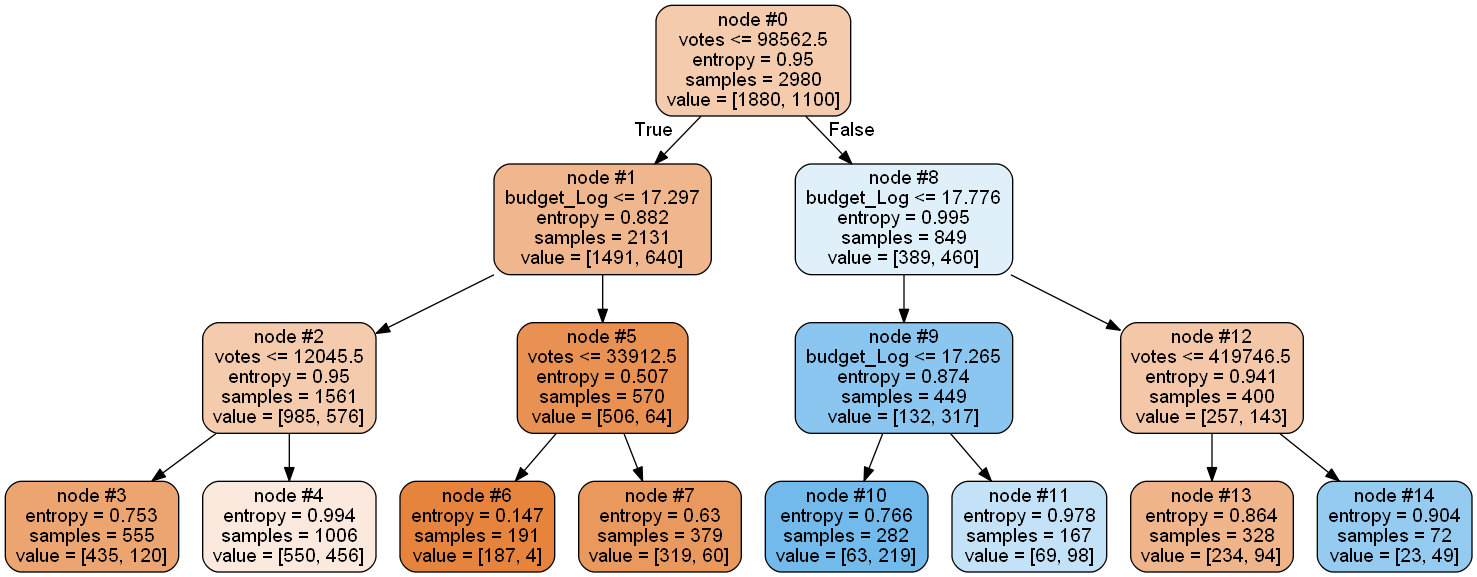

In [10]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, node_ids=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

1. There are 14 nodes in the model
2. Features = 
['score',
 'votes',
 'year',
 'runtime',
 'budget_Log',
 'genre_Action',
 'genre_Drama',
 'genre_Comedy',
 'rank_PG',
 'rank_R',
 'rank_other',
 'weekEnd',
 'quarter_1',
 'quarter_2',
 'quarter_3']


## Q.4.3

In [11]:
importances = pd.DataFrame({'feature':features,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

print(importances)  

         feature  importance
1          votes       0.531
4     budget_Log       0.469
0          score       0.000
2           year       0.000
3        runtime       0.000
5   genre_Action       0.000
6    genre_Drama       0.000
7   genre_Comedy       0.000
8        rank_PG       0.000
9         rank_R       0.000
10    rank_other       0.000
11       weekEnd       0.000
12     quarter_1       0.000
13     quarter_2       0.000
14     quarter_3       0.000


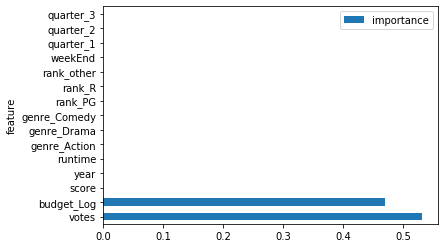

In [12]:
importances.plot.barh(x='feature', y='importance')

## Q.4.4

In [13]:
y_prob = dtree.predict_proba(X_test) #probability for 0, and 1
y_pred=dtree.predict(X_test)         #descision for 0-1 , with default 0.5 

# we create table with predicted probabilities and class labels.
y_prob=dtree.predict_proba(X_test)
y_prob1=dtree.predict_proba(X_test)[:,1]  
 #for train
train_y_prob1=dtree.predict_proba(X_train)[:,1]  


print('Num of actual profit - test group',sum(y_test))
print('Num of predicted profit - test group',sum(y_pred))

y_pred = pd.DataFrame(y_pred ,columns=['y_pred'])
ytest = pd.DataFrame(y_test,columns=['Profit_Ind'])
ytest.reset_index(drop=True,inplace=True)
test = pd.concat([ytest,y_pred],axis=1)
print(test.head())
ConfMat=pd.crosstab(test['Profit_Ind'],test['y_pred'])
ConfMat


Num of actual profit - test group 273
Num of predicted profit - test group 121
   Profit_Ind  y_pred
0           0       0
1           0       0
2           0       0
3           1       0
4           0       0


y_pred,0,1
Profit_Ind,,
0,443,30
1,182,91


## Q.4.5 - KPIs

In [14]:
# let's define absent = positive and present = negative
TP=ConfMat.iloc[0,0]
TN=ConfMat.iloc[1,1]
FN=ConfMat.iloc[0,1]
FP=ConfMat.iloc[1,0]

print("Accuracy = " , round(100*(TP+TN)/(TP+FN+TN+FP),2), "%")
print("Error Rate = " , round(100*(FP+FN)/(TP+FN+TN+FP),2), "%")
print("Recall(Profit=1) = Sensitivity = " , round(100*TN/(TN+FP),2),"%")
print("Recall(Profit=0) = Specififity = " , round(100*TP/(TP+FN),2), "%")
print("Precision(Profit=1) = " , round(100*TN/(TN+FN),2), "%")
print("Precision(Profit=0) = " , round(100*TP/(TP+FP),2), "%")
print("F1(Profit=1)= ", round(2*((TN/(TN+FN))*(TN/(TN+FP))/(TN/(TN+FN)+TN/(TN+FP))),2))
print("F1(Profit=0)= ", round(2*((TP/(TP+FP))*(TP/(TP+FN))/(TP/(TP+FP)+TP/(TP+FN))),2))

Accuracy =  71.58 %
Error Rate =  28.42 %
Recall(Profit=1) = Sensitivity =  33.33 %
Recall(Profit=0) = Specififity =  93.66 %
Precision(Profit=1) =  75.21 %
Precision(Profit=0) =  70.88 %
F1(Profit=1)=  0.46
F1(Profit=0)=  0.81


## Q.4.6 - ROC curve

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


dt_train_roc_auc = roc_auc_score(y_train, train_y_prob1)
dt_test_roc_auc = roc_auc_score(y_test, y_prob1)


print('dt_train_roc_auc',round(dt_train_roc_auc,3))
print('dt_test_roc_auc',round(dt_test_roc_auc,3))

dt_train_roc_auc 0.742
dt_test_roc_auc 0.741


In [16]:
roc_auc = roc_auc_score(y_test, y_prob1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
print(roc_auc)
print(fpr)
print(tpr)

0.7411580667394622
[0.         0.02536998 0.03805497 0.06342495 0.36575053 0.48625793
 0.71035941 0.90697674 1.        ]
[0.         0.19047619 0.24908425 0.33333333 0.72527473 0.80586081
 0.93040293 0.99267399 1.        ]


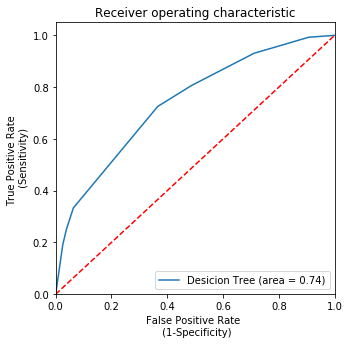

In [17]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Desicion Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--') #diagonal addition
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate \n (1-Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

The AUC explain us the performance of the model. in our model, auc = 74%

## Q.4.7

In [18]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

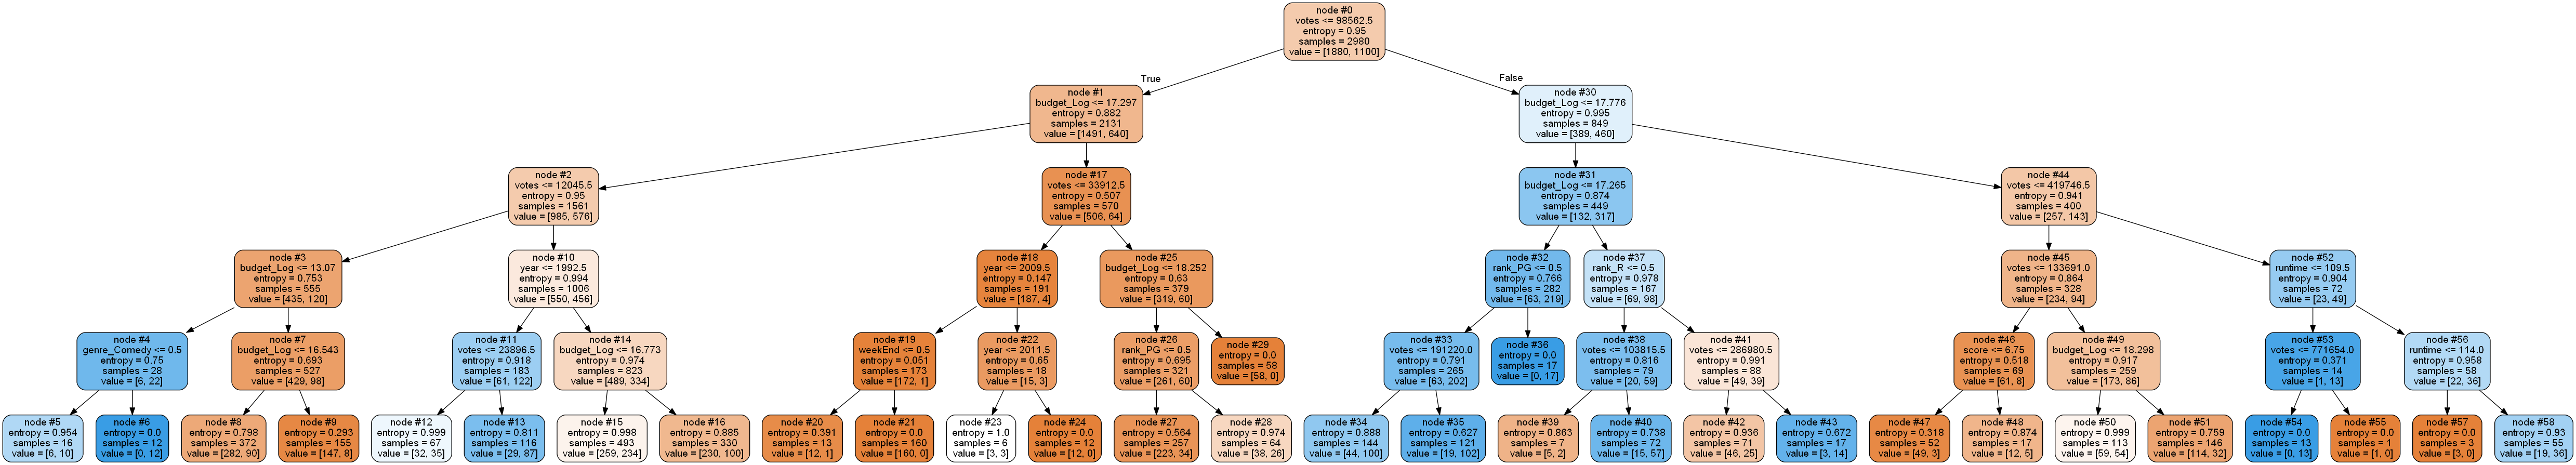

In [19]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, node_ids=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [20]:
importances = pd.DataFrame({'feature':features,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

print(importances)  

         feature  importance
4     budget_Log       0.450
1          votes       0.400
2           year       0.065
8        rank_PG       0.034
9         rank_R       0.018
3        runtime       0.013
7   genre_Comedy       0.009
0          score       0.006
11       weekEnd       0.006
5   genre_Action       0.000
6    genre_Drama       0.000
10    rank_other       0.000
12     quarter_1       0.000
13     quarter_2       0.000
14     quarter_3       0.000


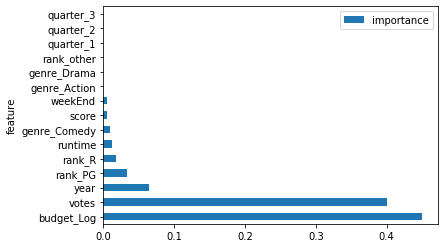

In [21]:
importances.plot.barh(x='feature', y='importance')

In [22]:
y_prob = dtree.predict_proba(X_test) #probability for 0, and 1
y_pred=dtree.predict(X_test)         #descision for 0-1 , with default 0.5 

# we create table with predicted probabilities and class labels.
y_prob=dtree.predict_proba(X_test)
y_prob1=dtree.predict_proba(X_test)[:,1]  
 #for train
train_y_prob1=dtree.predict_proba(X_train)[:,1]  


print('Num of actual profit - test group',sum(y_test))
print('Num of predicted profit - test group',sum(y_pred))

y_pred = pd.DataFrame(y_pred ,columns=['y_pred'])
ytest = pd.DataFrame(y_test,columns=['Profit_Ind'])
ytest.reset_index(drop=True,inplace=True)
test = pd.concat([ytest,y_pred],axis=1)
print(test.head())
ConfMat=pd.crosstab(test['Profit_Ind'],test['y_pred'])
ConfMat


Num of actual profit - test group 273
Num of predicted profit - test group 161
   Profit_Ind  y_pred
0           0       0
1           0       0
2           0       0
3           1       0
4           0       0


y_pred,0,1
Profit_Ind,,
0,438,35
1,147,126


In [23]:
# let's define absent = positive and present = negative
TP=ConfMat.iloc[0,0]
TN=ConfMat.iloc[1,1]
FN=ConfMat.iloc[0,1]
FP=ConfMat.iloc[1,0]

print("Accuracy = " , round(100*(TP+TN)/(TP+FN+TN+FP),2), "%")
print("Error Rate = " , round(100*(FP+FN)/(TP+FN+TN+FP),2), "%")
print("Recall(Profit=1) = Sensitivity = " , round(100*TN/(TN+FP),2),"%")
print("Recall(Profit=0) = Specififity = " , round(100*TP/(TP+FN),2), "%")
print("Precision(Profit=1) = " , round(100*TN/(TN+FN),2), "%")
print("Precision(Profit=0) = " , round(100*TP/(TP+FP),2), "%")
print("F1(Profit=1)= ", round(2*((TN/(TN+FN))*(TN/(TN+FP))/(TN/(TN+FN)+TN/(TN+FP))),2))
print("F1(Profit=0)= ", round(2*((TP/(TP+FP))*(TP/(TP+FN))/(TP/(TP+FP)+TP/(TP+FN))),2))

Accuracy =  75.6 %
Error Rate =  24.4 %
Recall(Profit=1) = Sensitivity =  46.15 %
Recall(Profit=0) = Specififity =  92.6 %
Precision(Profit=1) =  78.26 %
Precision(Profit=0) =  74.87 %
F1(Profit=1)=  0.58
F1(Profit=0)=  0.83


In [24]:
dt_train_roc_auc = roc_auc_score(y_train, train_y_prob1)
dt_test_roc_auc = roc_auc_score(y_test, y_prob1)


print('dt_train_roc_auc',round(dt_train_roc_auc,3))
print('dt_test_roc_auc',round(dt_test_roc_auc,3))

dt_train_roc_auc 0.801
dt_test_roc_auc 0.779


In [25]:
roc_auc = roc_auc_score(y_test, y_prob1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
print(roc_auc)
print(fpr)
print(tpr)

0.7793988956779655
[0.         0.00422833 0.01479915 0.01479915 0.02114165 0.02325581
 0.03805497 0.04862579 0.05073996 0.07399577 0.0782241  0.10993658
 0.27061311 0.29175476 0.31078224 0.42706131 0.43128964 0.43128964
 0.57505285 0.6384778  0.76955603 0.77589852 0.79704017 0.87315011
 1.        ]
[0.         0.02930403 0.12454212 0.13553114 0.17948718 0.28571429
 0.36630037 0.41758242 0.42490842 0.46153846 0.46153846 0.4981685
 0.66300366 0.68498168 0.70695971 0.79120879 0.79120879 0.7985348
 0.89010989 0.91941392 0.95604396 0.95604396 0.97069597 0.98534799
 1.        ]


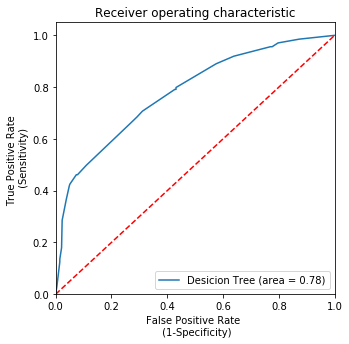

In [26]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Desicion Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--') #diagonal addition
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate \n (1-Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

2. The last model is better, with 78% performance.
3. More node that you have, the model is more complexity. the model create more splitting areas 

## Q.5 - Random forest

## Q.5.1 

Adventage: random forest working like "wisdom of crowds". decreases the models variance, without increasing the bias

Disadvantage: 

## Q.5.2 + Q.5.3

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
predictions = rfc.predict(X_test)
probability_to1=rfc.predict_proba(X_test)[:,1] 
train_probability_to1=rfc.predict_proba(X_train)[:,1] 

In [29]:
sum(probability_to1)

271.4000000000004

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

ConfMat1=pd.crosstab(y_test,predictions)
ConfMat1

col_0,0,1
Profit_Ind,,
0,420,53
1,126,147


In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       473
           1       0.75      0.56      0.64       273

    accuracy                           0.77       746
   macro avg       0.77      0.73      0.74       746
weighted avg       0.77      0.77      0.76       746



In [77]:
rf_train_roc_auc = roc_auc_score(y_train, train_probability_to1)
rf_test_roc_auc = roc_auc_score(y_test, probability_to1)

print('rf_train_roc_auc',round(rf_train_roc_auc,3))
print('rf_test_roc_auc',round(rf_test_roc_auc,3))

rf_train_roc_auc 1.0
rf_test_roc_auc 0.844


In [78]:
roc_auc = roc_auc_score(y_test, probability_to1)
fpr, tpr, thresholds = roc_curve(y_test, probability_to1)

print(roc_auc)
print(fpr)
print(tpr)

0.8435208202650063
[0.         0.         0.         0.         0.         0.
 0.00211416 0.00211416 0.00211416 0.00211416 0.00211416 0.00211416
 0.00211416 0.00211416 0.00211416 0.00211416 0.00422833 0.00422833
 0.01268499 0.01902748 0.02325581 0.02536998 0.02536998 0.02748414
 0.03171247 0.03171247 0.0359408  0.03805497 0.0422833  0.04439746
 0.05285412 0.05708245 0.06553911 0.06976744 0.07610994 0.08245243
 0.09936575 0.10570825 0.11627907 0.12262156 0.13953488 0.14799154
 0.1564482  0.16913319 0.17336152 0.18393235 0.20084567 0.20718816
 0.23044397 0.23678647 0.25369979 0.26849894 0.28964059 0.3192389
 0.34883721 0.36997886 0.39534884 0.41014799 0.43128964 0.44186047
 0.46300211 0.49471459 0.52219873 0.56448203 0.57716702 0.59830867
 0.62367865 0.6448203  0.6744186  0.70190275 0.73784355 0.7589852
 0.79069767 0.80761099 0.83298097 0.85200846 0.88160677 0.90063425
 0.90909091 0.92600423 0.97251586 0.97674419 0.99154334 0.99788584
 1.        ]
[0.         0.003663   0.00732601 0.0146

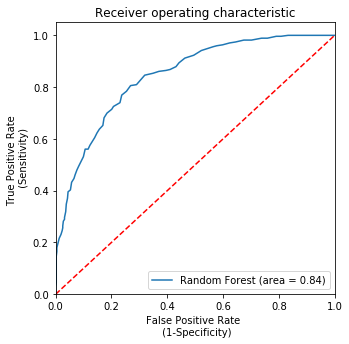

In [79]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--') #diagonal addition
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate \n (1-Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Q.5.4 - random forest have best performance - 84%

## Q.6 - 